# TASK-1 : TITANIC SURVIVAL PREDICTION

## AIM: 
Build a machine learning model to predict whether a passenger survived the Titanic disaster based on features like age, gender, Pclass, etc.

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [6]:
df= pd.read_csv("Titanic.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.drop('PassengerId', axis=1, inplace=True)

In [14]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [15]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [18]:
df.duplicated().sum()

0

## EDA

In [20]:
# Let's check the discrete and continous features
categorical_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns

print("Categorical Columns:",categorical_cols)
print("Numerical Columns:",num_cols)

Categorical Columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical Columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [21]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

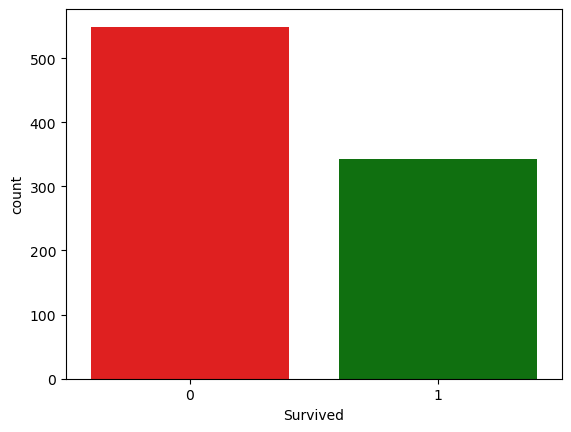

In [22]:
sns.countplot(x='Survived', data=df, palette= ('r','g'))
plt.show()

In [23]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

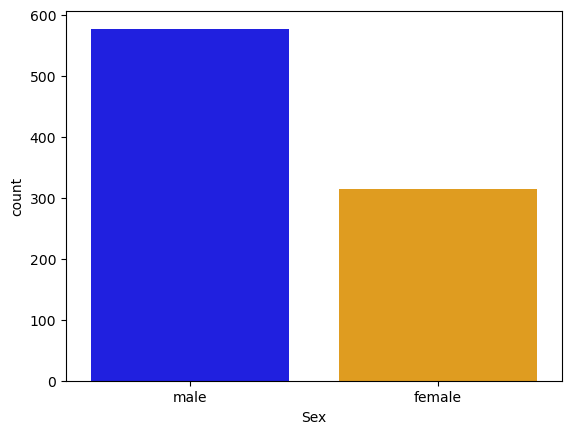

In [24]:
sns.countplot(x='Sex', data=df, palette=('blue','orange'))
plt.show()

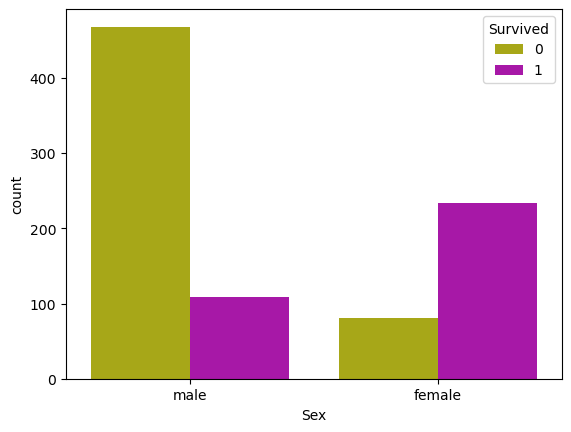

In [25]:
sns.countplot(x='Sex', hue='Survived', data=df, palette=('y','m'))
plt.show()

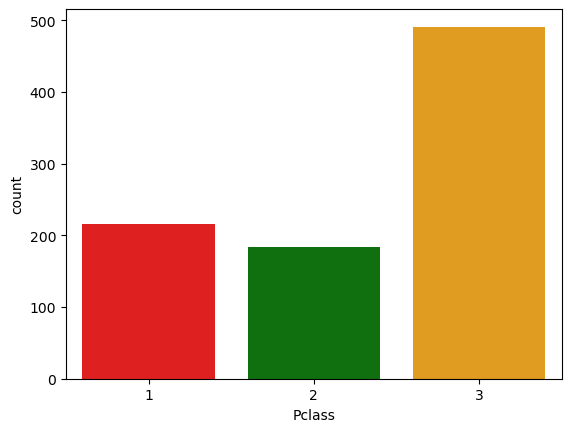

In [26]:
sns.countplot(x='Pclass', data=df, palette=('r','g','orange'))
plt.show()

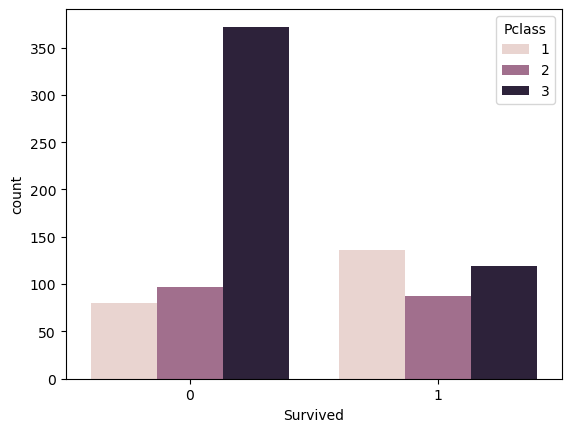

In [27]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

## Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

df['Name']= lab_enc.fit_transform(df['Name'])
df['Sex']= lab_enc.fit_transform(df['Sex'])
df['Ticket']= lab_enc.fit_transform(df['Ticket'])
df['Cabin']= lab_enc.fit_transform(df['Cabin'])
df['Embarked']= lab_enc.fit_transform(df['Embarked'])
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.0,1,0,523,7.2500,47,2
1,1,1,190,0,38.0,1,0,596,71.2833,81,0


## Boxplot

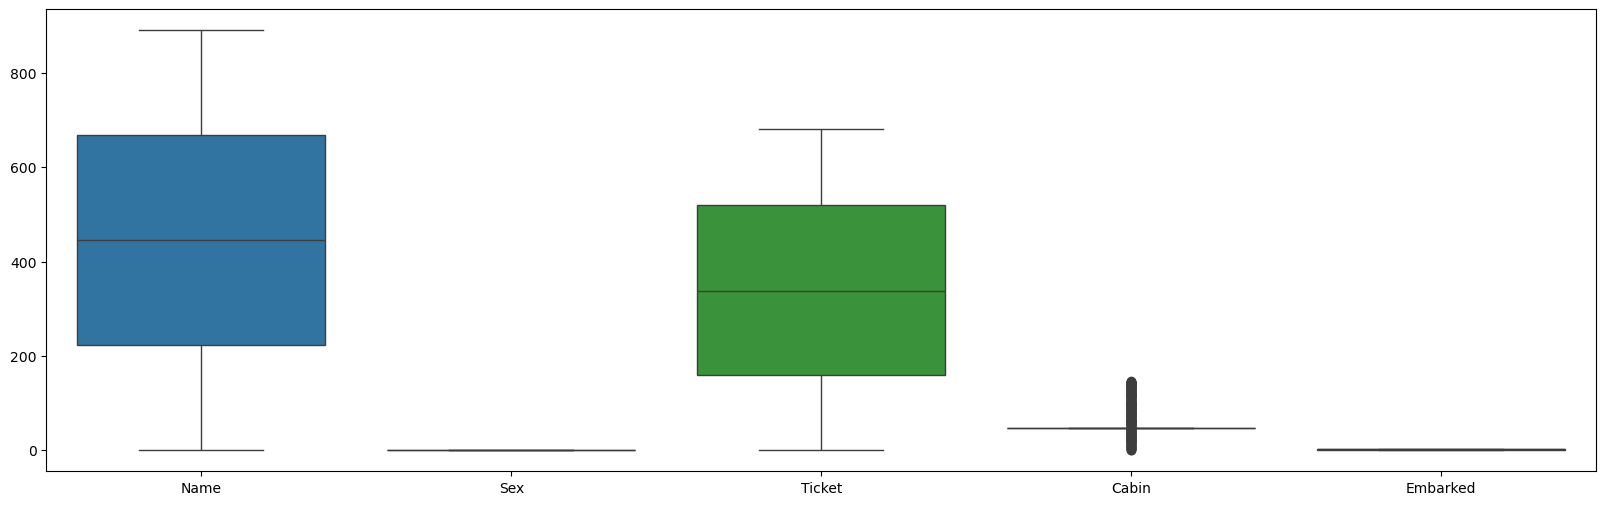

In [31]:
plt.figure(figsize=(20,6))
sns.boxplot(df[categorical_cols])
plt.show()

## Treat Outliers

In [33]:
q1=df.quantile(0.25)

In [34]:
q3=df.quantile(0.75)

In [35]:
iqr=(q3-q1)

In [36]:
c_low= q1['Cabin']-(1.5*iqr['Cabin'])
c_high=q3['Cabin']+(1.5*iqr['Cabin'])

In [37]:
c_df=df.copy()
c_df['Cabin']=np.where(c_df['Cabin']>c_high,
                    c_high,
                    np.where(c_df['Cabin']<c_low,
                    c_low,
                    c_df['Cabin']
    )
)

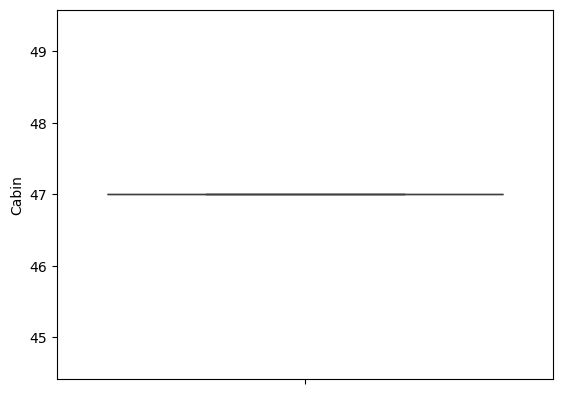

In [38]:
sns.boxplot(c_df['Cabin'])
plt.show()

## Standard Scaler

In [40]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [41]:
x=df.drop('Survived', axis=1)

In [42]:
y=df['Survived']

In [43]:
x_scaled= scaler.fit_transform(x)

In [44]:
x_scaled = pd.DataFrame(scaler.transform(x), columns=x.columns)
x_scaled.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.827377,-1.310217,0.737695,-0.592481,0.432793,-0.473674,0.918966,-0.502445,-0.281881,0.585954
1,-1.566107,-0.991410,-1.355574,0.638789,0.432793,-0.473674,1.282625,0.786845,1.161545,-1.942303
2,0.827377,-0.357685,-1.355574,-0.284663,-0.474545,-0.473674,1.646283,-0.488854,-0.281881,0.585954
3,-1.566107,-0.672604,-1.355574,0.407926,0.432793,-0.473674,-1.442322,0.420730,0.057748,0.585954
4,0.827377,-1.671790,0.737695,0.407926,-0.474545,-0.473674,0.664904,-0.486337,-0.281881,0.585954


In [45]:
x_scaled.corr()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719
Cabin,-0.248495,0.034129,-0.102643,0.056011,-0.005539,0.022682,-0.072200,0.090516,1.000000,0.023804
Embarked,0.162098,-0.006117,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,0.023804,1.000000


## VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
print(vif)

        VIF  Features
0  2.042906    Pclass
1  1.014761      Name
2  1.116856       Sex
3  1.217420       Age
4  1.284140     SibSp
5  1.325912     Parch
6  1.174524    Ticket
7  1.724525      Fare
8  1.085729     Cabin
9  1.084846  Embarked


In [48]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

## Heatmap

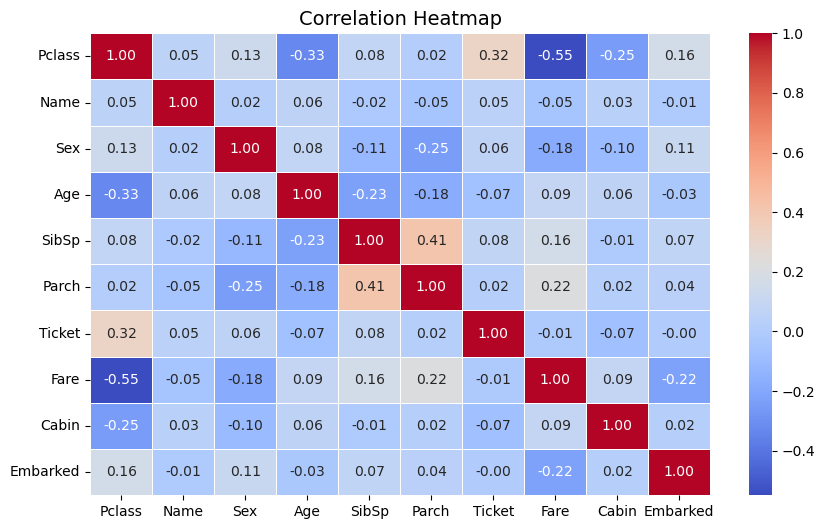

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(x_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

## Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,1,637,1,45.5,0,0,20,28.5,56,2
733,2,84,1,23.0,0,0,228,13.0,47,2


In [55]:
x_test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,3,561,1,29.699118,1,1,189,15.2458,47,0
439,2,447,1,31.000000,0,0,547,10.5000,47,2


In [56]:
y_train.head(2)

331    0
733    0
Name: Survived, dtype: int64

In [57]:
y_test.head(2)

709    1
439    0
Name: Survived, dtype: int64

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
lR=LogisticRegression()
lR.fit(x_train, y_train)

LogisticRegression()

## Model Prediction

In [62]:
test_x_pred= lR.predict(x_test)

In [63]:
print(test_x_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]


In [64]:
train_x_pred= lR.predict(x_train)

In [65]:
print(train_x_pred)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

In [66]:
print("Accuracy of test data:",accuracy_score(y_test, test_x_pred))

Accuracy of test data: 0.776536312849162


In [67]:
print("Accuracy of train data:",accuracy_score(y_train, train_x_pred))

Accuracy of train data: 0.7963483146067416


In [68]:
print("Confusion Matrix of test data:",confusion_matrix(y_test, test_x_pred))

Confusion Matrix of test data: [[87 18]
 [22 52]]


In [69]:
print("Confusion Matrix of train data:",confusion_matrix(y_train, train_x_pred))

Confusion Matrix of train data: [[380  64]
 [ 81 187]]


In [70]:
print("Classification Report of test data:",classification_report(y_test, test_x_pred))

Classification Report of test data:               precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [71]:
print("Classification Report of train data:",classification_report(y_train, train_x_pred))

Classification Report of train data:               precision    recall  f1-score   support

           0       0.82      0.86      0.84       444
           1       0.75      0.70      0.72       268

    accuracy                           0.80       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.80      0.79       712



## Test the Prediction

In [153]:
new_data = pd.DataFrame({"Pclass":[3],"Name":[561],"Sex":[0],"Age":[23],"SibSp":[1],"Parch":[2],"Ticket":[228],"Fare":[13.0],"Cabin":[47],"Embarked":[2]})

In [155]:
prediction = lR.predict(new_data)

In [157]:
print("Survival:",prediction)
if(prediction==1):
    print("survived")
else:
    print("not survived")

Survival: [1]
survived
